# Methane detection hackathon

### Goal : detect methane leaks in the atmosphere based on satelite images

It's a binary classification problem : does the image contain a plume of methane or not ?

In order to do that, a dataset containing images in `tif` format is provided along with metadata including :
* path
* date the satelite image was taken
* class (`plume` or `no_plume`)
* an ID identifying the location
* latitude and longitude coordinates locating the center of the plume (`lat`,`lon`)
* pixel coordinates locating the center of the plume in the image (`coord_x`,`coord_y`). Please be midnful that the axis origin (0,0) is at the top left corner of the image

The dataset contains two folders:
- `plume` : contains all images with plumes of methane.
- `no_plume` : contains all images with no plume of methane.


**All images have a resolution of 64x64 and they are in gray scale (2D-arrays).**

Images names are written in the following format `{date}_methane_mixing_ratio_id_{location id}.tif`

# Necessary imports

### 1. Install requirements

In [53]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2. Import statements

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import tifffile
import rasterio
from rasterio.plot import show, show_hist
import warnings
warnings.filterwarnings("ignore", category=rasterio.errors.NotGeoreferencedWarning)

# Loading the data

In [55]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Read an image

In [121]:
# Load the images

# FIRST THE NO PLUME

# Define the path to the directory containing the .tif images
dir_path = '/content/drive/MyDrive/QB/data/images/no_plume'

# Create an empty list to store the loaded images
images = []

# Loop through all the .tif files in the directory
for file in os.listdir(dir_path):
    if file.endswith('.tif'):
        # Open the .tif file using rasterio
        with rasterio.open(os.path.join(dir_path, file)) as src:
            # Read the raster data as a NumPy array
            image = src.read()
            # Reverse the scale of the image
            #max_val = np.iinfo(image.dtype).max
            #image = max_val - image
            # Append the image to the list of loaded images
            images.append(image)

# Convert the list of loaded images to a numpy array
img_no_plume = np.array(images)
img_no_plume = img_no_plume.reshape(214, 64, 64, 1)

# THEN THE PLUME
# Define the path to the directory containing the .tif images
dir_path = '/content/drive/MyDrive/QB/data/images/plume'

# Create an empty list to store the loaded images
images = []

# Loop through all the .tif files in the directory
for file in os.listdir(dir_path):
    if file.endswith('.tif'):
        # Open the .tif file using rasterio
        with rasterio.open(os.path.join(dir_path, file)) as src:
            # Read the raster data as a NumPy array
            image = src.read()
            # Reverse the scale of the image
            #max_val = np.iinfo(image.dtype).max
            #image = max_val - image
            # Append the image to the list of loaded images
            images.append(image)

# Convert the list of loaded images to a numpy array
img_plume = np.array(images)
img_plume = img_plume.reshape(214, 64, 64, 1)

In [57]:
print('We have', len(img_plume),'images with plume and', len(img_no_plume),'images with no plume')

We have 214 images with plume and 214 images with no plume


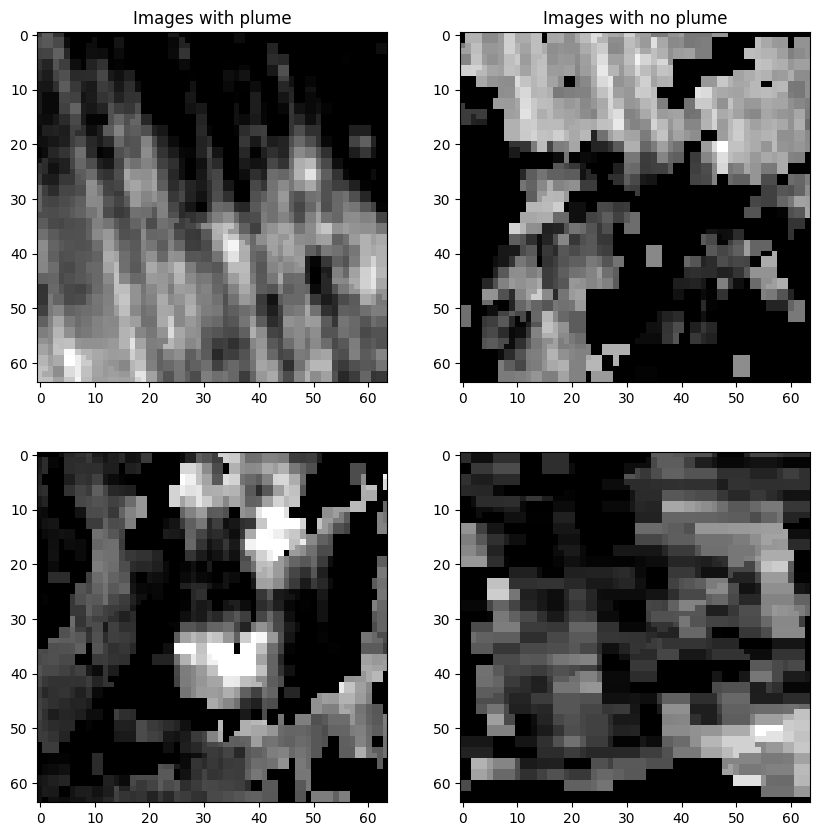

In [122]:
# Plotting a plume and a no plume image
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0,0].imshow(img_plume[0], cmap='gray')
axs[1,0].imshow(img_plume[1], cmap='gray')
axs[0,0].set_title('Images with plume')

axs[0,1].imshow(img_no_plume[0], cmap='gray')
axs[1,1].imshow(img_no_plume[1], cmap='gray')
axs[0,1].set_title('Images with no plume')

plt.show()

Remark: I don't see any visible differentiation

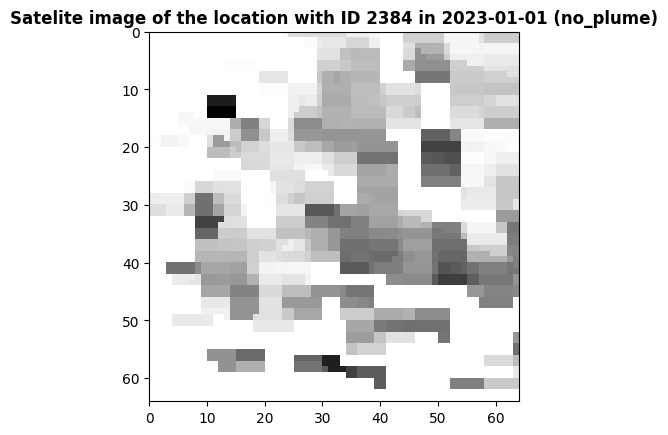

<Axes: title={'center': 'Satelite image of the location with ID 2384 in 2023-01-01 (no_plume)'}>

In [59]:
# This can also be used to plot
path = "/content/drive/MyDrive/QB/data/images/no_plume/20230101_methane_mixing_ratio_id_2384.tif"
example_image_no_plume = rasterio.open(path)
show(example_image_no_plume, cmap="Greys", title="Satelite image of the location with ID 2384 in 2023-01-01 (no_plume)")

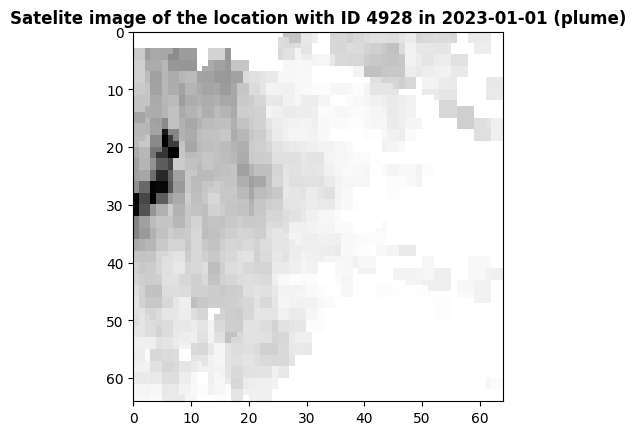

<Axes: title={'center': 'Satelite image of the location with ID 4928 in 2023-01-01 (plume)'}>

In [60]:
# This can also be used to plot
path = "/content/drive/MyDrive/QB/data/images/plume/20230101_methane_mixing_ratio_id_4928.tif"
example_image_plume = rasterio.open(path)
show(example_image_plume, cmap="Greys", title="Satelite image of the location with ID 4928 in 2023-01-01 (plume)")

### 4. Distribution of pixel intensity in greyscale

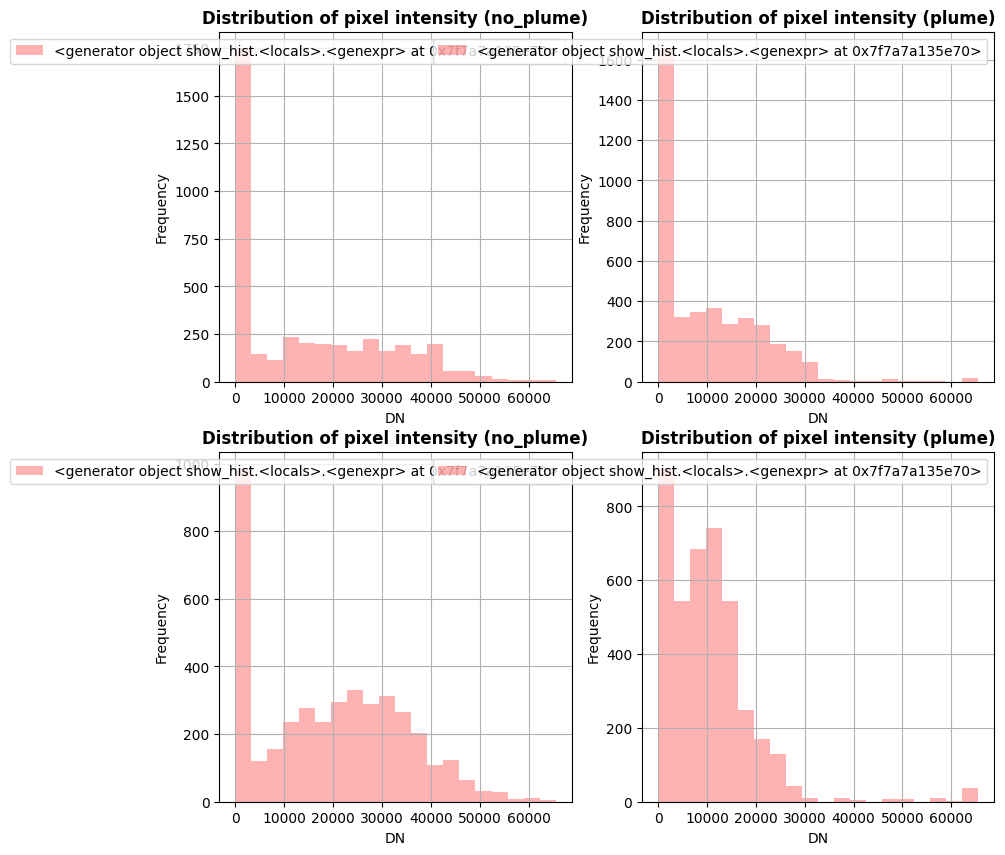

In [73]:
example_image_no_plume2 = rasterio.open('/content/drive/MyDrive/QB/data/images/no_plume/20230101_methane_mixing_ratio_id_4690.tif')
example_image_plume2 = rasterio.open('/content/drive/MyDrive/QB/data/images/plume/20230102_methane_mixing_ratio_id_1465.tif')


fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
show_hist(example_image_no_plume, bins=20, alpha=0.3, title="Distribution of pixel intensity (no_plume)", ax=ax[0,0])
show_hist(example_image_no_plume2, bins=20, alpha=0.3, title="Distribution of pixel intensity (no_plume)", ax=ax[1,0])

show_hist(example_image_plume, bins=20, alpha=0.3, title="Distribution of pixel intensity (plume)", ax=ax[0,1])
show_hist(example_image_plume2, bins=20, alpha=0.3, title="Distribution of pixel intensity (plume)", ax=ax[1,1])


### 5. Metadata

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/QB/data/metadata.csv')

In [ ]:
metadata.head(5)

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...


In [ ]:
metadata.shape

(430, 9)

In [116]:
# Checking that the data is clean
metadata.describe()

,date,lat,lon,coord_x,coord_y
count,4.300000e+02,430.000000,430.000000,430.000000,430.000000
mean,2.023021e+07,29.219819,53.829356,31.448837,33.002326
std,9.208158e+01,15.522465,48.342344,16.800931,21.022410
min,2.023010e+07,-47.482444,-114.883661,0.000000,-9.000000
25%,2.023012e+07,23.603333,37.203908,18.000000,14.000000
50%,2.023021e+07,31.528750,61.693333,30.500000,34.500000
75%,2.023030e+07,36.136960,81.723449,44.000000,51.000000
max,2.023041e+07,68.570113,128.748371,64.000000,77.000000


In [123]:
len(metadata[metadata.coord_y<0])

11

Is it possible to have negative coordinates?

In [118]:
metadata['plume'].value_counts()

yes    216
no     214
Name: plume, dtype: int64

!!!!!Looks like I have 2 les plume than I should, why?

Idea: if the coordinates of no plume are arbitrary the we can set them to a specific value

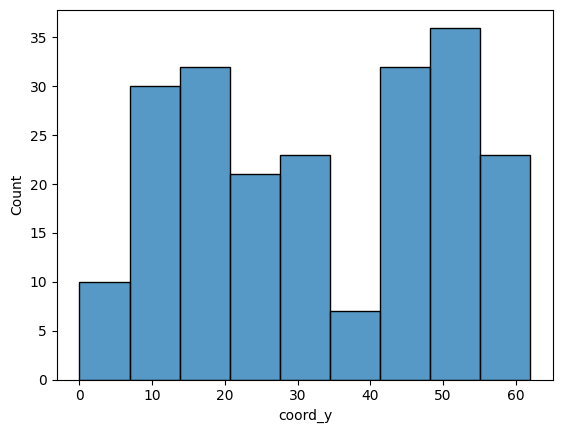

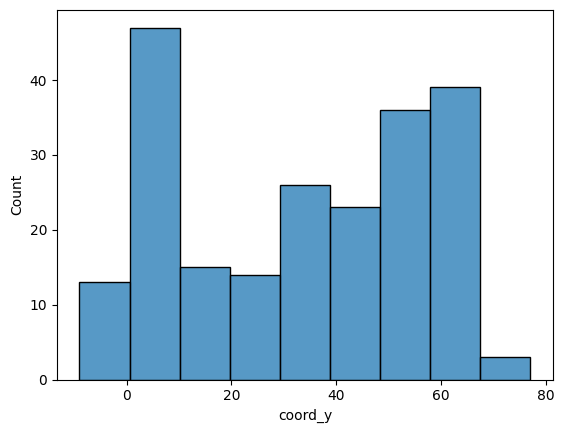

In [128]:
no_plume = metadata[metadata.plume=='no']
plume = metadata[metadata.plume=='yes']

sns.histplot(data=no_plume, x='coord_y')
plt.show()

sns.histplot(data=plume, x='coord_y')
plt.show()

Looks like they make no sense

In [80]:
# Checking the ones I printed above (with the second method)
metadata[(metadata.id_coord=='id_4928') & (metadata.date==20230101)]

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
204,20230101,id_4928,yes,train,38.633636,54.236364,17,5,images/plume/20230101_methane_mixing_ratio_id_...


Checked the spot that corresponds to the center of the plume, nothing obvious to the naked eye

In [90]:
metadata[metadata.id_coord=='id_4928'].sort_values(by='date')

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
204,20230101,id_4928,yes,train,38.633636,54.236364,17,5,images/plume/20230101_methane_mixing_ratio_id_...
124,20230102,id_4928,yes,train,38.633636,54.236364,17,4,images/plume/20230102_methane_mixing_ratio_id_...
51,20230118,id_4928,yes,train,38.633636,54.236364,16,4,images/plume/20230118_methane_mixing_ratio_id_...
66,20230202,id_4928,yes,train,38.633636,54.236364,16,4,images/plume/20230202_methane_mixing_ratio_id_...
58,20230219,id_4928,yes,train,38.633636,54.236364,19,5,images/plume/20230219_methane_mixing_ratio_id_...
189,20230324,id_4928,yes,train,38.633636,54.236364,20,-1,images/plume/20230324_methane_mixing_ratio_id_...


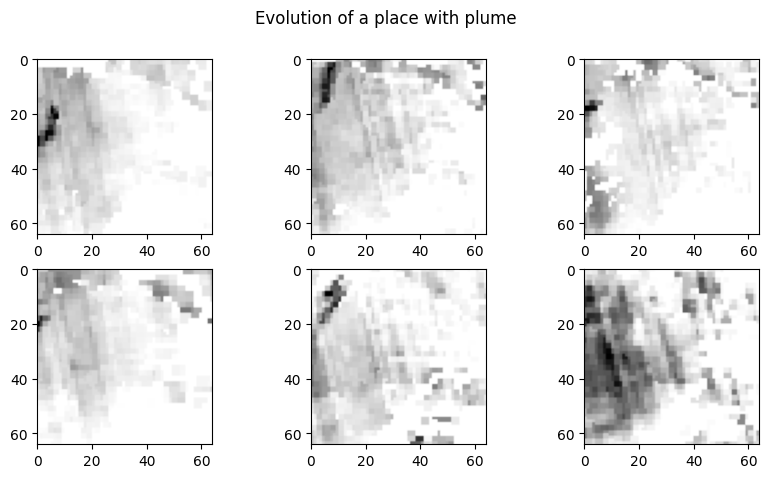

In [119]:
# This can also be used to plot
same_place1 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230101_methane_mixing_ratio_id_4928.tif")
same_place2 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230102_methane_mixing_ratio_id_4928.tif")
same_place3 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230118_methane_mixing_ratio_id_4928.tif")
same_place4 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230202_methane_mixing_ratio_id_4928.tif")
same_place5 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230219_methane_mixing_ratio_id_4928.tif")
same_place6 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230324_methane_mixing_ratio_id_4928.tif")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

show(same_place1, cmap="Greys", ax=ax[0,0])
show(same_place2, cmap="Greys", ax=ax[0,1])
show(same_place3, cmap="Greys", ax=ax[0,2])
show(same_place4, cmap="Greys", ax=ax[1,0])
show(same_place5, cmap="Greys", ax=ax[1,1])
show(same_place6, cmap="Greys", ax=ax[1,2])

plt.suptitle('Evolution of a place with plume')
plt.show()

In [111]:
metadata[metadata.id_coord=='id_6675'].sort_values(by='date')

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
97,20230115,id_6675,yes,train,31.52875,74.330625,23,47,images/plume/20230115_methane_mixing_ratio_id_...
128,20230117,id_6675,yes,train,31.52875,74.330625,22,48,images/plume/20230117_methane_mixing_ratio_id_...
85,20230126,id_6675,yes,train,31.52875,74.330625,24,49,images/plume/20230126_methane_mixing_ratio_id_...
184,20230127,id_6675,yes,train,31.52875,74.330625,24,46,images/plume/20230127_methane_mixing_ratio_id_...
72,20230131,id_6675,yes,train,31.52875,74.330625,23,47,images/plume/20230131_methane_mixing_ratio_id_...
174,20230221,id_6675,yes,train,31.52875,74.330625,22,49,images/plume/20230221_methane_mixing_ratio_id_...
0,20230223,id_6675,yes,train,31.52875,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
23,20230227,id_6675,yes,train,31.52875,74.330625,23,47,images/plume/20230227_methane_mixing_ratio_id_...
82,20230327,id_6675,yes,train,31.52875,74.330625,24,51,images/plume/20230327_methane_mixing_ratio_id_...
144,20230402,id_6675,yes,train,31.52875,74.330625,24,38,images/plume/20230402_methane_mixing_ratio_id_...


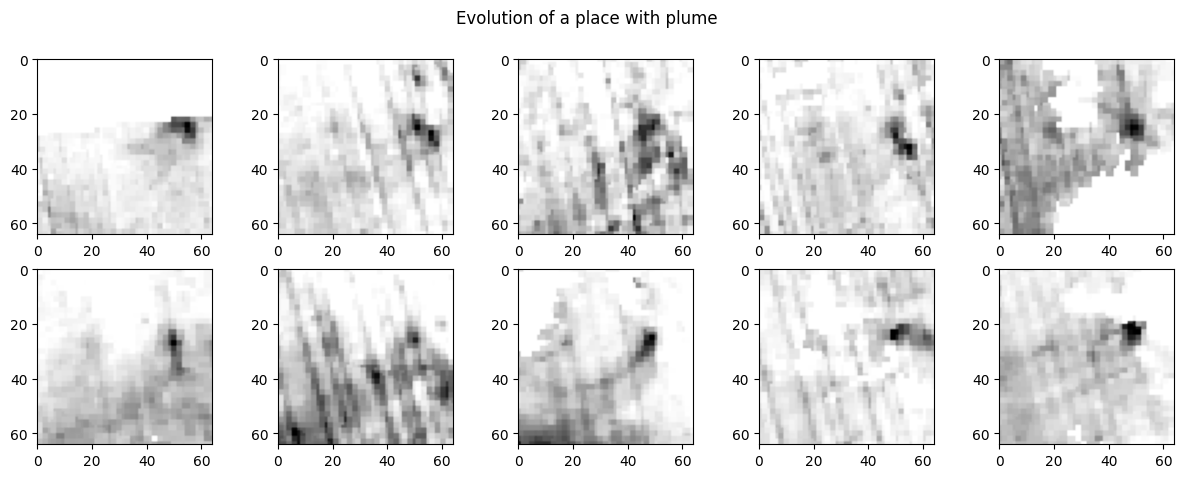

In [115]:
# This can also be used to plot
same_place1 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230115_methane_mixing_ratio_id_6675.tif")
same_place2 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230117_methane_mixing_ratio_id_6675.tif")
same_place3 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230126_methane_mixing_ratio_id_6675.tif")
same_place4 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230127_methane_mixing_ratio_id_6675.tif")
same_place5 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230131_methane_mixing_ratio_id_6675.tif")
same_place6 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230221_methane_mixing_ratio_id_6675.tif")
same_place7 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230223_methane_mixing_ratio_id_6675.tif")
same_place8 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230227_methane_mixing_ratio_id_6675.tif")
same_place9 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230327_methane_mixing_ratio_id_6675.tif")
same_place10 = rasterio.open("/content/drive/MyDrive/QB/data/images/plume/20230402_methane_mixing_ratio_id_6675.tif")



fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

show(same_place1, cmap="Greys", ax=ax[0,0])
show(same_place2, cmap="Greys", ax=ax[0,1])
show(same_place3, cmap="Greys", ax=ax[0,2])
show(same_place4, cmap="Greys", ax=ax[0,3])
show(same_place5, cmap="Greys", ax=ax[0,4])
show(same_place6, cmap="Greys", ax=ax[1,0])
show(same_place7, cmap="Greys", ax=ax[1,1])
show(same_place8, cmap="Greys", ax=ax[1,2])
show(same_place9, cmap="Greys", ax=ax[1,3])
show(same_place10, cmap="Greys", ax=ax[1,4])

plt.suptitle('Evolution of a place with plume')
plt.show()